In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('/kaggle/input/chennai-temp/Chennai.csv')

In [3]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW'], dtype='object')

In [4]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC'], axis=1)

In [5]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 05:00:00,22.12
1,2004-01-01 06:00:00,22.73
2,2004-01-01 07:00:00,24.27
3,2004-01-01 08:00:00,25.66
4,2004-01-01 09:00:00,26.67


In [6]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,22.12
2004-01-01 06:00:00,2004-01-01 06:00:00,22.73
2004-01-01 07:00:00,2004-01-01 07:00:00,24.27
2004-01-01 08:00:00,2004-01-01 08:00:00,25.66
2004-01-01 09:00:00,2004-01-01 09:00:00,26.67


In [7]:
data=data.sort_index()

In [8]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,22.12
2004-01-01 06:00:00,2004-01-01 06:00:00,22.73
2004-01-01 07:00:00,2004-01-01 07:00:00,24.27
2004-01-01 08:00:00,2004-01-01 08:00:00,25.66
2004-01-01 09:00:00,2004-01-01 09:00:00,26.67


In [9]:
data.count()

Date    175320
T2M     175320
dtype: int64

In [10]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [11]:
# Splitting data into train and test sets
train_data = data[:-120]  # Use all data except the last 48 hours for training
test_data = data[-120:]   # Use the last 48 hours for testing

In [12]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [13]:
check=train_data[:8760] #1 year data
test=train_data[8760:8772] #0.5 days = 12 hours

In [14]:
#to store RMSE after every year
rmse_record={}

In [15]:
# Fit SARIMA model
chennai_model = SARIMAX(check["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=check["Date"])
chennai_result = chennai_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.92976D-01    |proj g|=  1.06509D+00


 This problem is unconstrained.



At iterate    5    f= -5.07290D-01    |proj g|=  6.03903D-01

At iterate   10    f= -5.34959D-01    |proj g|=  6.86628D-01

At iterate   15    f= -5.48517D-01    |proj g|=  8.04287D-02

At iterate   20    f= -5.49306D-01    |proj g|=  7.14408D-03

At iterate   25    f= -5.49323D-01    |proj g|=  2.45706D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   2.457D-06  -5.493D-01
  F = -0.54932273008333932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [16]:
# Forecast temperatures for the next 48 hours
forecast = chennai_result.get_forecast(steps=12)

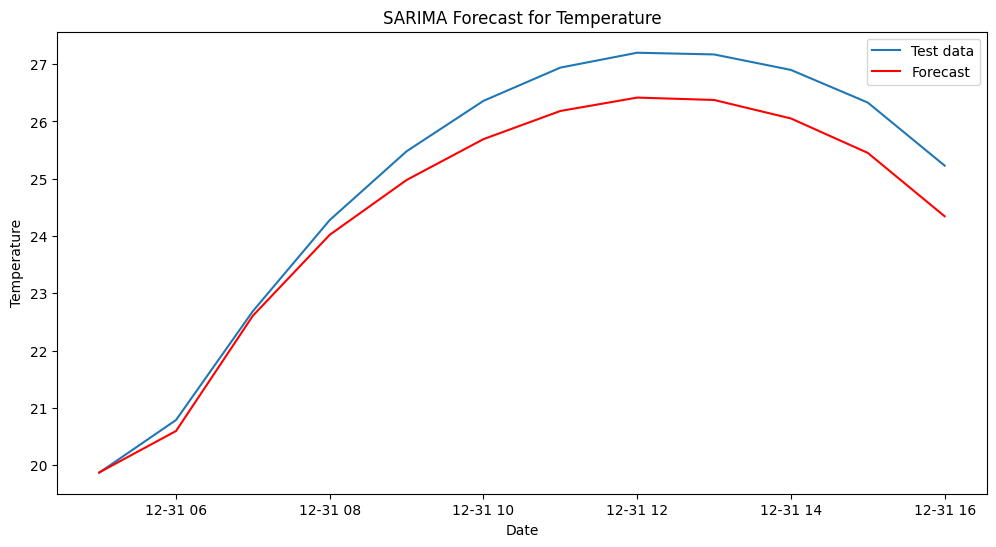

In [17]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test.index, test["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [18]:
rmse = np.sqrt(mean_squared_error(test["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')
rmse_record[1]=rmse

Root Mean Squared Error (RMSE): 0.6386725899432402


In [19]:
table=[8760*x for x in range(1, 21)]

training now:  2


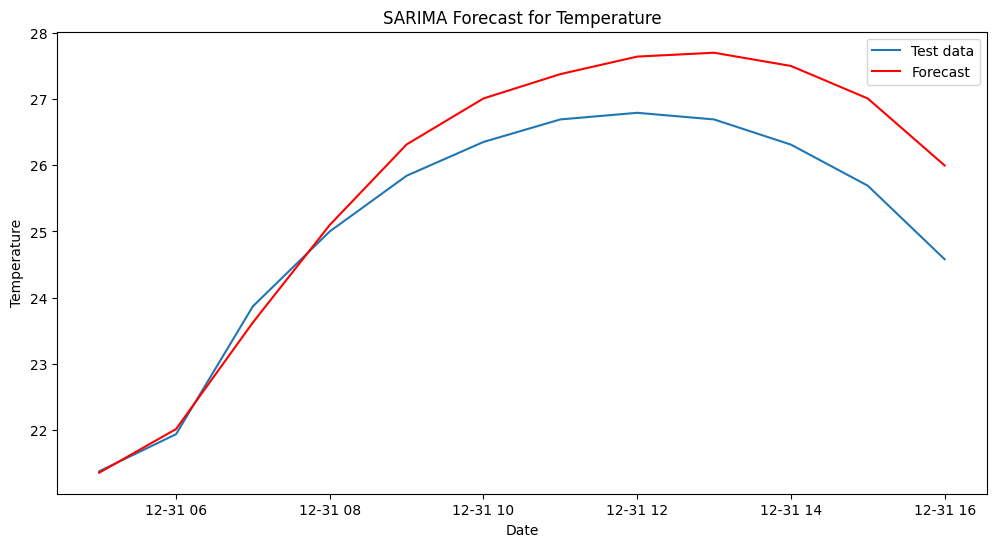

Root Mean Squared Error (RMSE): 0.8202864440585034
training now:  3


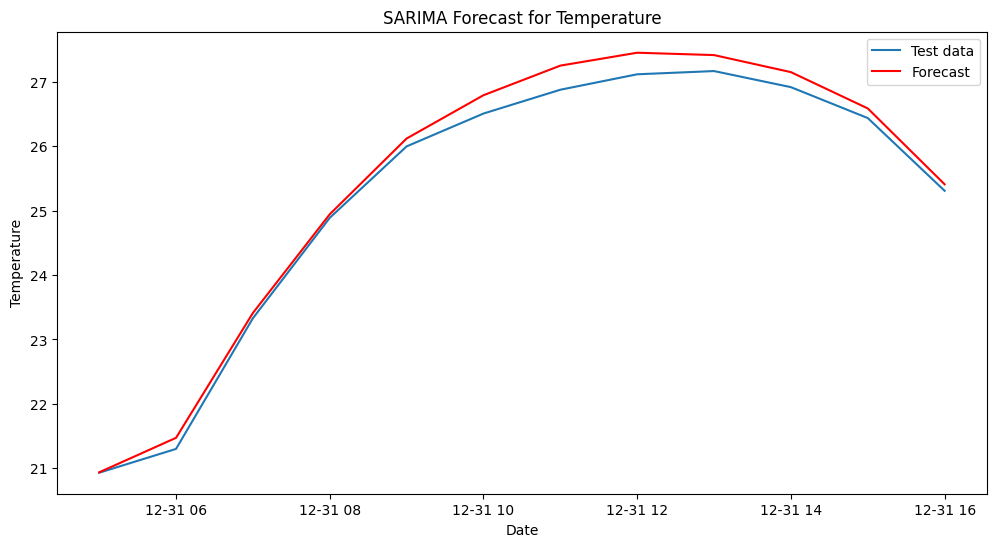

Root Mean Squared Error (RMSE): 0.21147448724418763
training now:  4


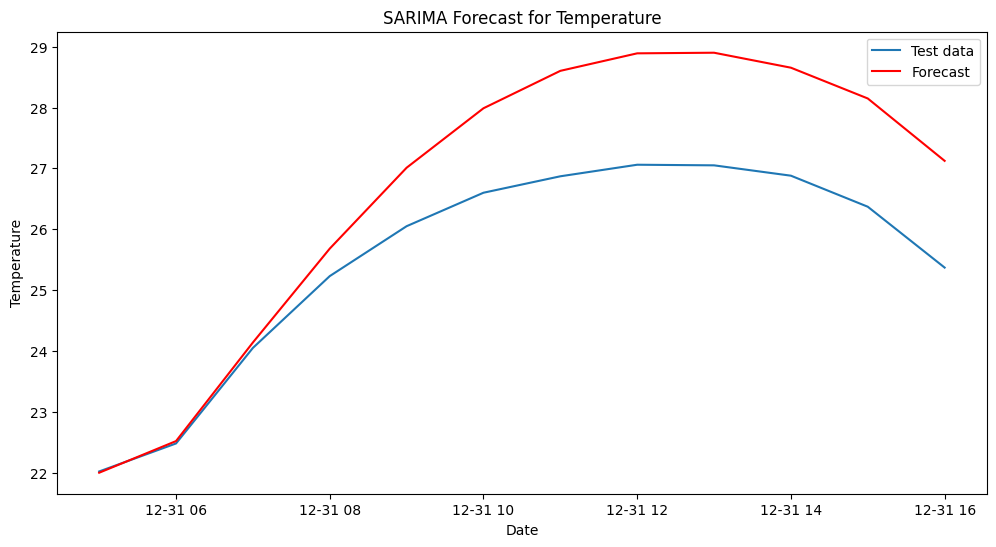

Root Mean Squared Error (RMSE): 1.3610544738750765
training now:  5


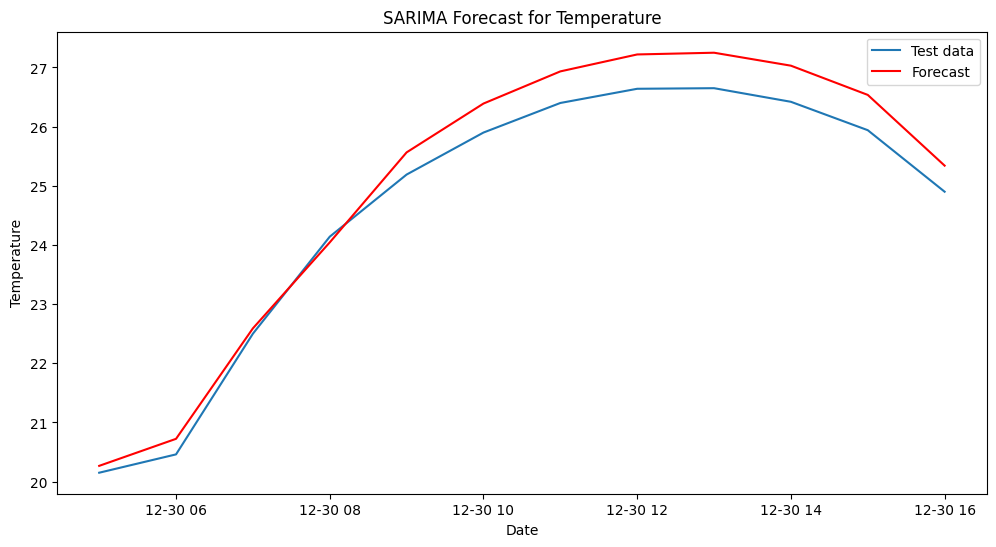

Root Mean Squared Error (RMSE): 0.445820302441773
training now:  6


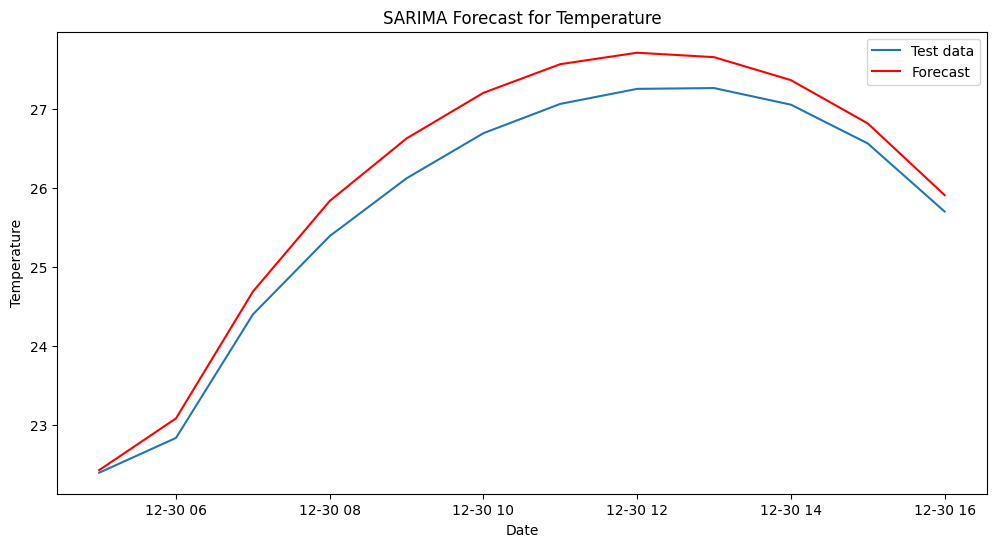

Root Mean Squared Error (RMSE): 0.3733304286701081
training now:  7


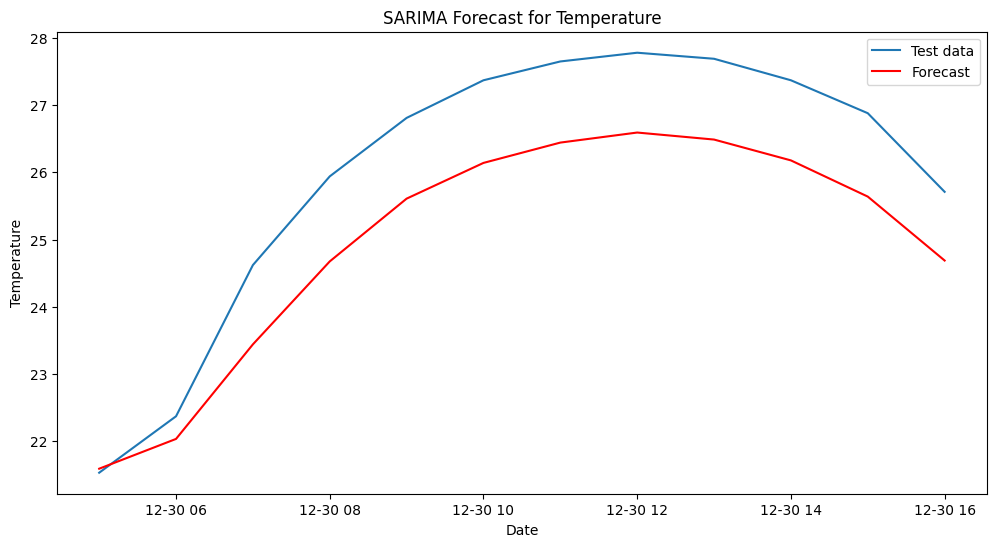

Root Mean Squared Error (RMSE): 1.094934742488189
training now:  8


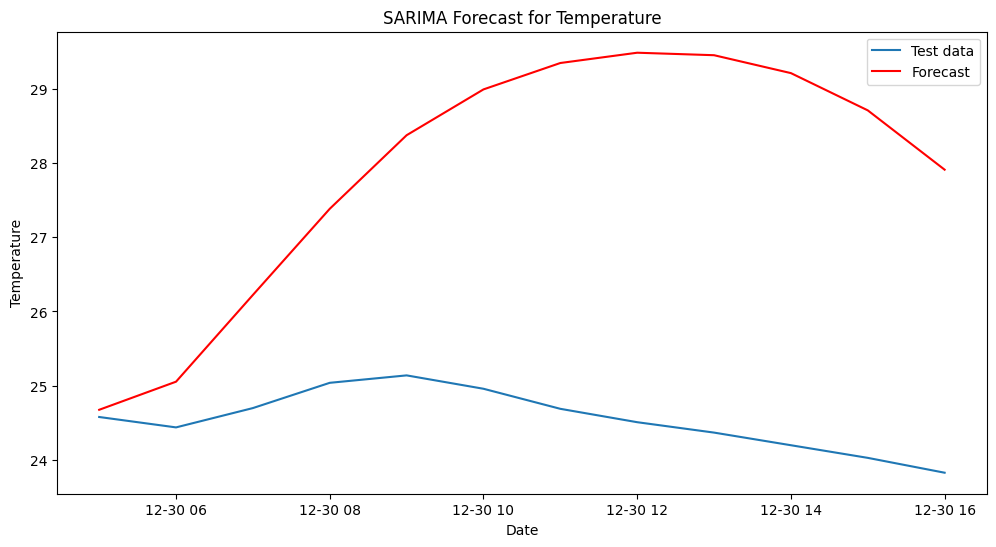

Root Mean Squared Error (RMSE): 3.7709252233300217
training now:  9


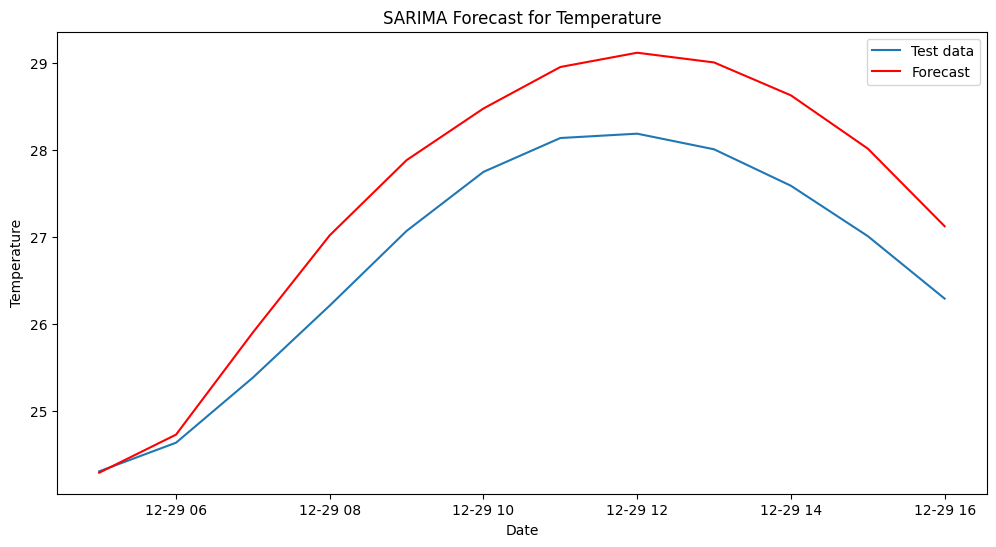

Root Mean Squared Error (RMSE): 0.7889391357648559
training now:  10


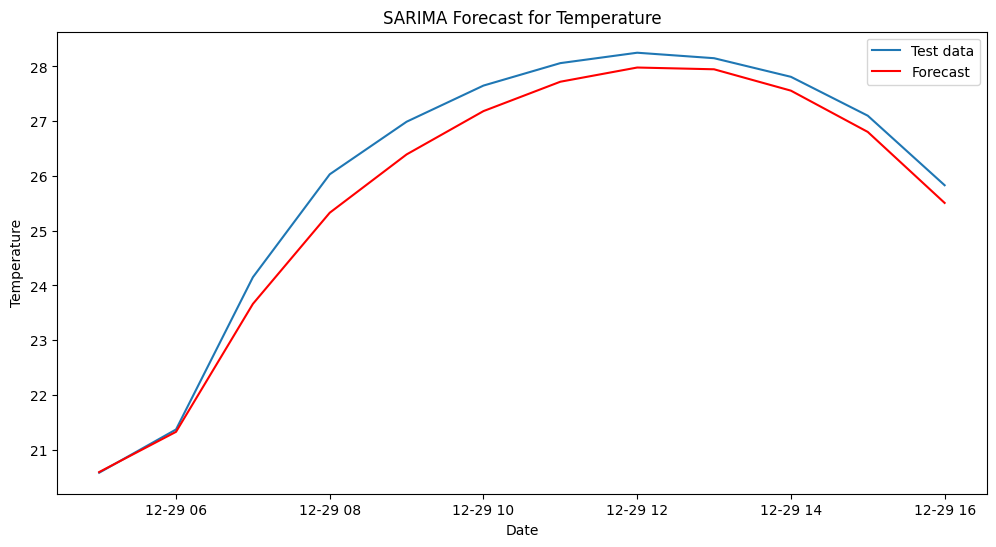

Root Mean Squared Error (RMSE): 0.38634620177734985
training now:  11


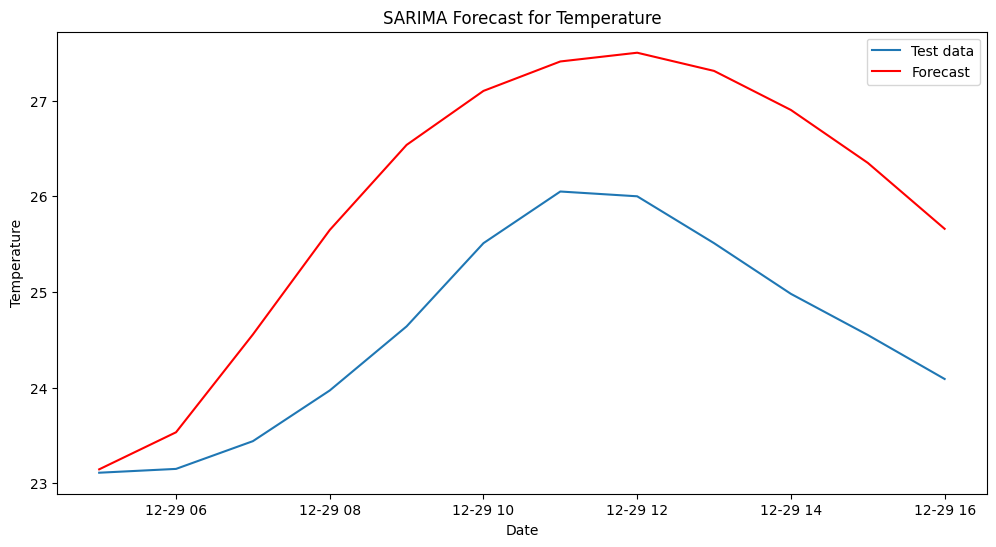

Root Mean Squared Error (RMSE): 1.5023770683165896
training now:  12


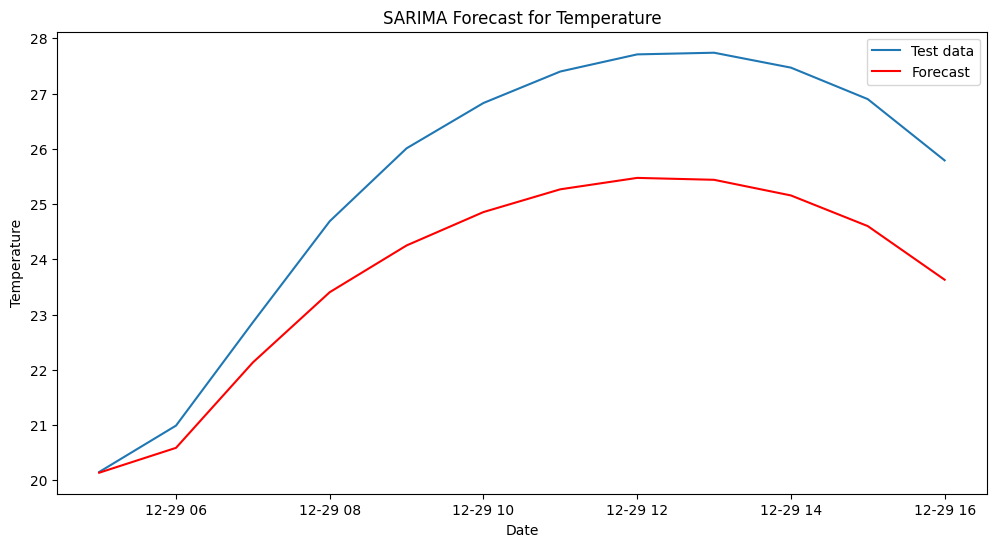

Root Mean Squared Error (RMSE): 1.8135915616266822
training now:  13


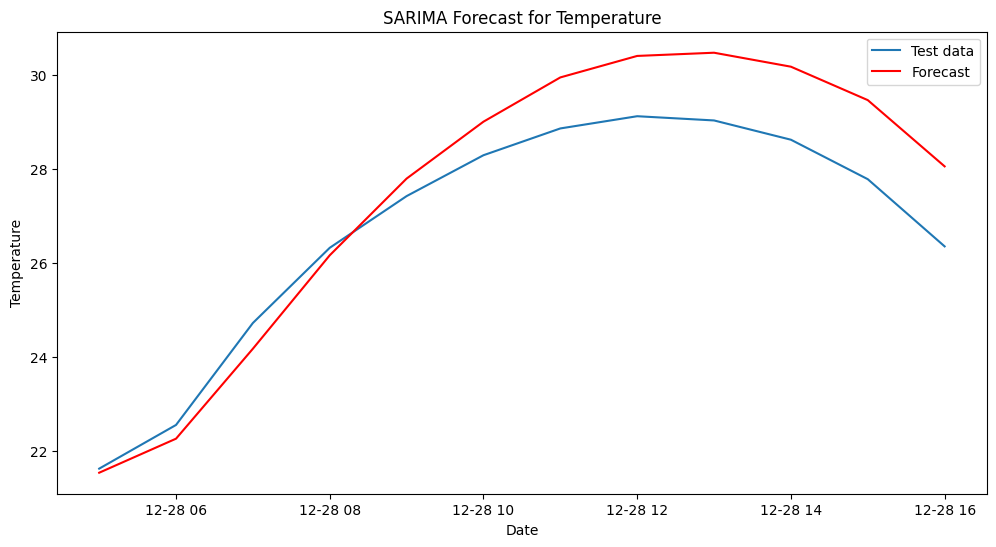

Root Mean Squared Error (RMSE): 1.0845210806219414
training now:  14


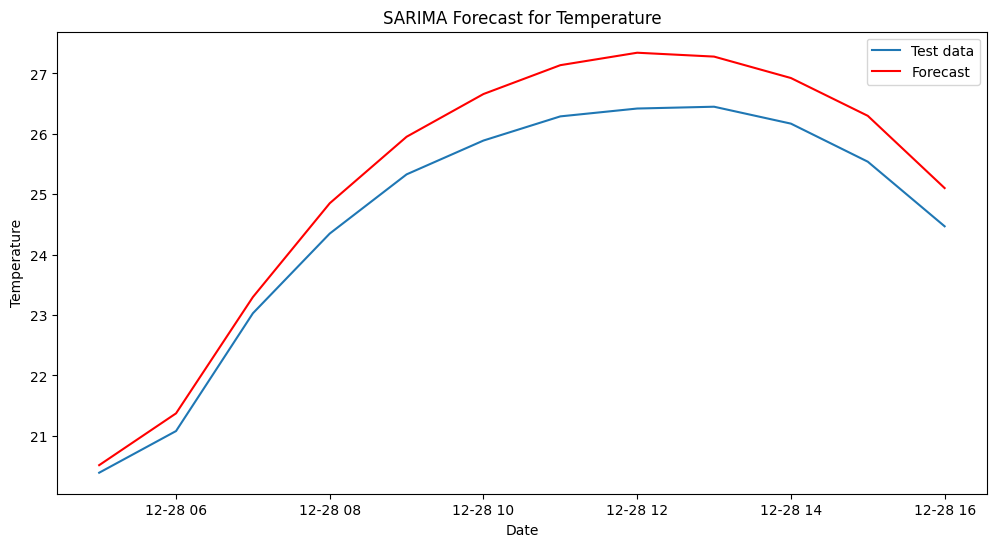

Root Mean Squared Error (RMSE): 0.6592293630951215
training now:  15


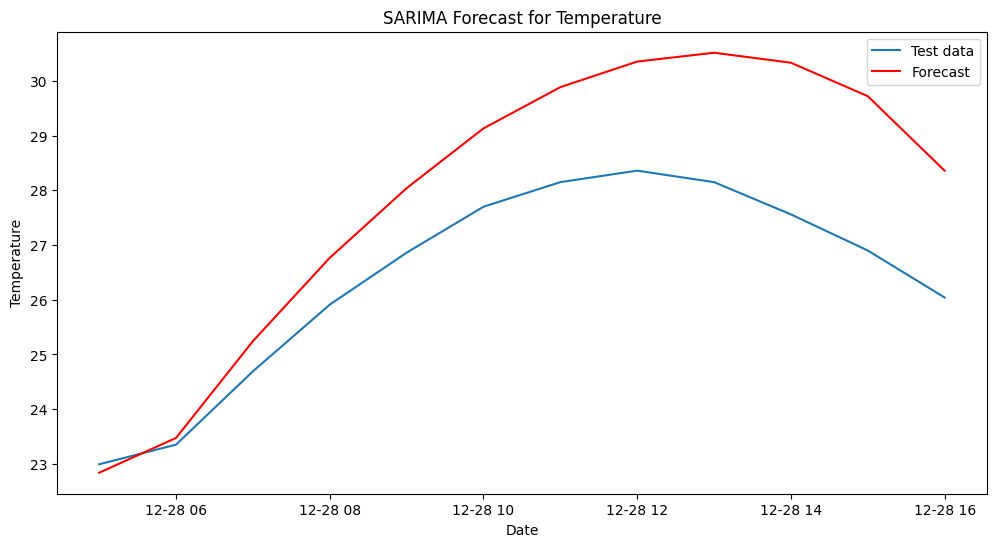

Root Mean Squared Error (RMSE): 1.7830679917991943
training now:  16


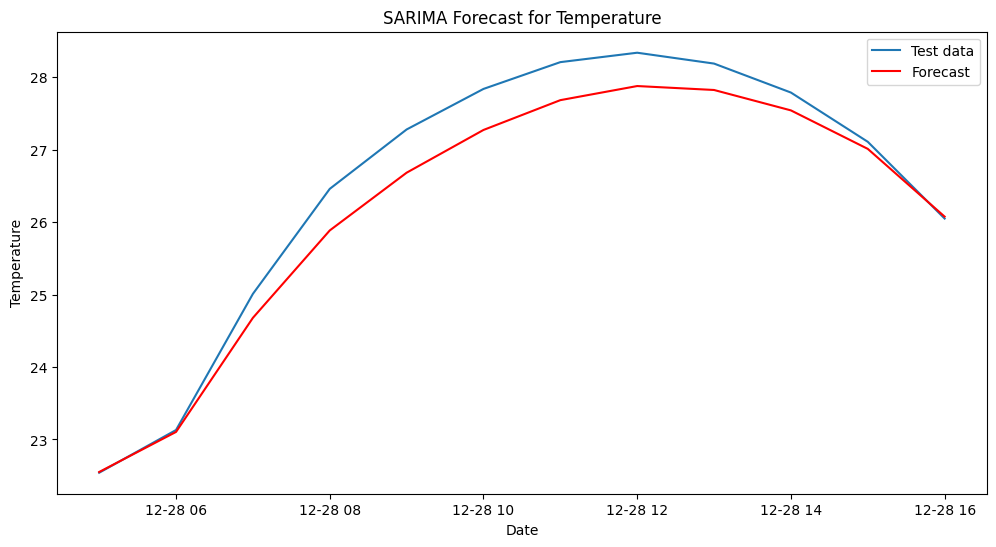

Root Mean Squared Error (RMSE): 0.3882585804012226
training now:  17


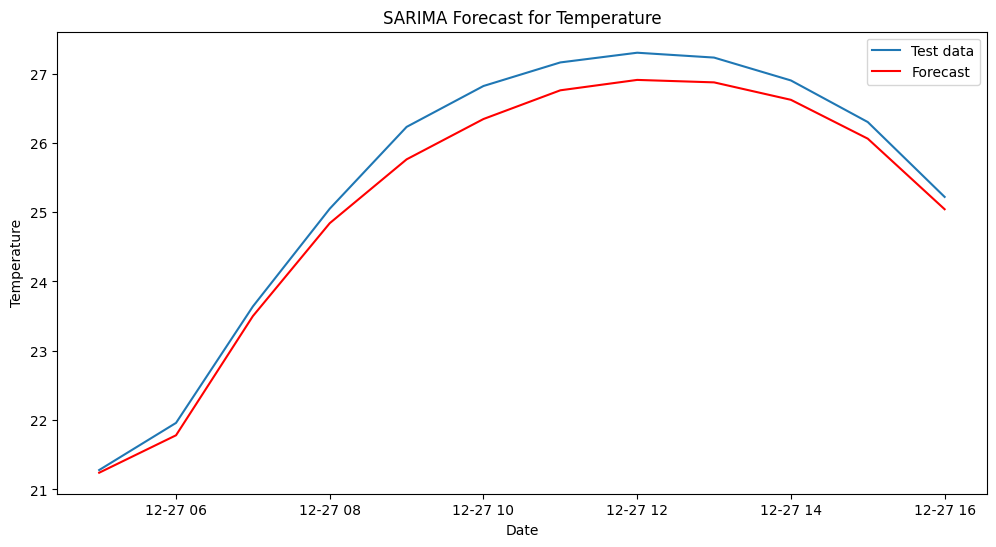

Root Mean Squared Error (RMSE): 0.30999348133384713
training now:  18


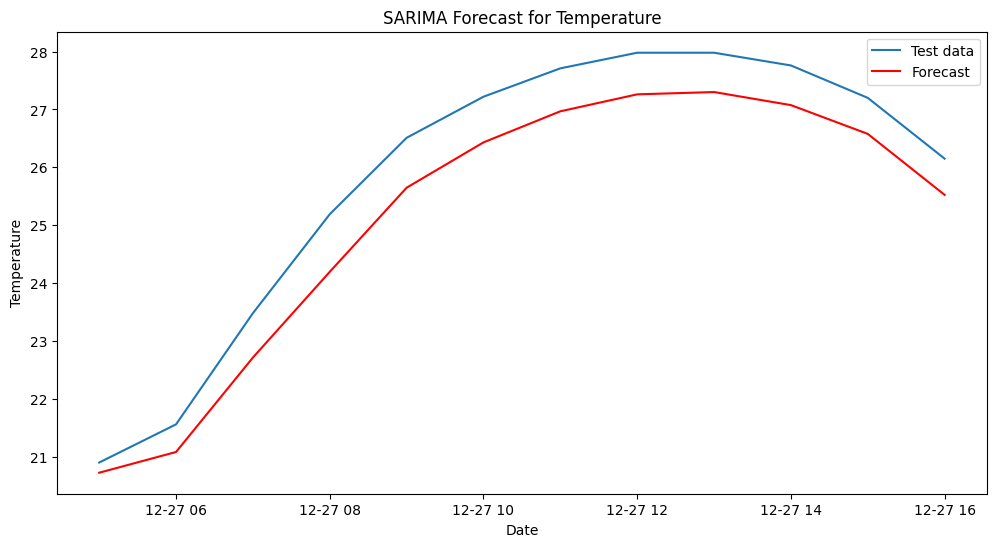

Root Mean Squared Error (RMSE): 0.7059090147052258
training now:  19


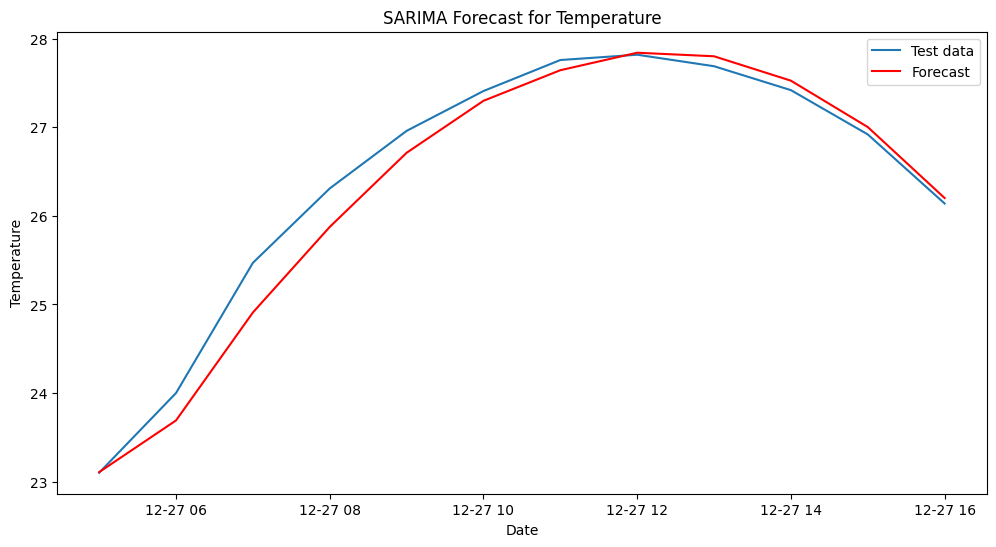

Root Mean Squared Error (RMSE): 0.2450552845526688
training now:  20


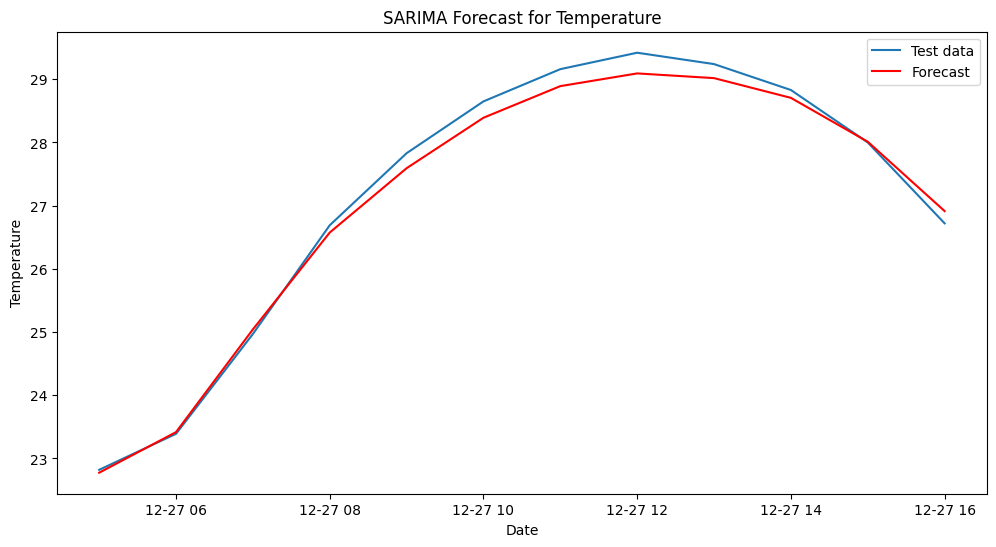

Root Mean Squared Error (RMSE): 0.18847954609292866


In [20]:
for i in range(2, 21):
    check2=train_data[table[i-2]:table[i-1]]
    test2= test_data[:12] if i==20 else train_data[table[i-1]:table[i-1]+12]# 0.5 days = 12 hours
    print("training now: ", i)
    #training
    chennai_result=chennai_result.extend(check2["TEMP"])
    #forecasting
    forecast2 = chennai_result.get_forecast(steps=12)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data[:12].index, test_data[:12]["TEMP"], label='Test data') if i==20 else plt.plot(test2.index, test2["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data[:12]["TEMP"], forecast2.predicted_mean))if i==20 else np.sqrt(mean_squared_error(test2["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [21]:
rmse_record

{1: 0.6386725899432402,
 2: 0.8202864440585034,
 3: 0.21147448724418763,
 4: 1.3610544738750765,
 5: 0.445820302441773,
 6: 0.3733304286701081,
 7: 1.094934742488189,
 8: 3.7709252233300217,
 9: 0.7889391357648559,
 10: 0.38634620177734985,
 11: 1.5023770683165896,
 12: 1.8135915616266822,
 13: 1.0845210806219414,
 14: 0.6592293630951215,
 15: 1.7830679917991943,
 16: 0.3882585804012226,
 17: 0.30999348133384713,
 18: 0.7059090147052258,
 19: 0.2450552845526688,
 20: 0.18847954609292866}

In [22]:
#saving pickle file of model
with open("/kaggle/working/chennai_model.pkl", 'wb') as f:
    pickle.dump(chennai_result, f)